# Homework 1: IMDB Dataset
**IMDB Dataset includes sentimental text reviews of the movie, and it is labeled whether the review shows positive(1) or negative(0) opinions.**
- IMDB 데이터셋은 영화에 대한 유저의 주관, 감성이 포함된 비정형 텍스트 데이터셋이다.
- 이진으로 레이블링된 데이터이기 때문에 지도학습이 가능하다.

### 1. Load the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb

top_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=top_words)

# num_words=top_words 는 리뷰에 등장하는 빈도가 1순위-10,000순위인 단어만 train 과 test 에서 사용하도록 정해준다.
# 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있다.

In [2]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

# IMDB 데이터셋의 train data 와 test data 의 비율은 50:50 으로 정해져있다. 
# 그 이유는 데이터셋을 50:50으로 분할하여 88.89%의 정확도를 얻었다고 스탠포드 대학교의 논문에 소개되어있기 때문이다.

number of train data : 25000
number of test data : 25000


### 2. EDA (Exploratory Data Analysis)
탐색적 데이터 분석(EDA)은 데이터셋에 대한 전체적인 정보를 제공한다는 점에서 중요하다.

In [3]:
len_result = [len(s) for s in train_data]

print('Max length of the review : {}'.format(np.max(len_result)))
print('Average length of the review : {}'.format(np.mean(len_result)))

Max length of the review : 2494
Average length of the review : 238.71364


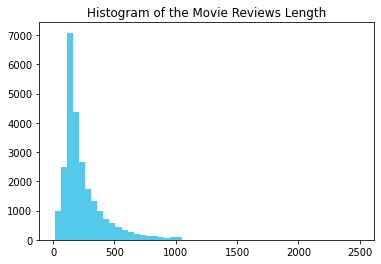

In [4]:
plt.title('Histogram of the Movie Reviews Length')
plt.hist(len_result, bins=50, color='#54CAEA')
plt.show()

# 리뷰마다 길이가 다르며, 길면 2000자가 넘는 경우도 있다. 그러나 평균적으로는 200자에 가까우며, 대부분의 리뷰는 500자 이내임을 알 수 있다.

In [5]:
negative, positive = np.unique(train_labels, return_counts=True)

# 레이블링이 되어있으면 긍정 리뷰 데이터(1), 안 되어있으면 부정 리뷰 데이터(0)이다.

print("Number of Negative/Positive Reviews:")
print(np.asarray((negative, positive)))

# train data 의 긍정 리뷰 데이터와 부정 리뷰 데이터의 개수는 각 12,500개로 동일하다.

Number of Negative/Positive Reviews:
[[    0     1]
 [12500 12500]]


### 3. One-Hot Encoding
원 핫 인코딩(one-hot encoding)은 텍스트를 숫자형으로 바꿔주는 전처리 작업이다. 이 과정을 거쳐야 데이터로써 모델의 학습이 가능하다.

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


## Experiments
### (1) Basic Neural Network Model
- activation function: relu, sigmoid
- optimizer: RMSprop
- loss function: binary_crossentropy
- batch size: 512
- epoch: 20

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 97ms/step - loss: 0.6015 - accuracy: 0.7110 - val_loss: 0.4224 - val_accuracy: 0.8500
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3369 - accuracy: 0.8966 - val_loss: 0.3307 - val_accuracy: 0.8690
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2397 - accuracy: 0.9261 - val_loss: 0.2812 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1787 - accuracy: 0.9454 - val_loss: 0.2748 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1418 - accuracy: 0.9574 - val_loss: 0.3043 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1149 - accuracy: 0.9670 - val_loss: 0.2928 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0942 - accuracy: 0.9745 - val_loss: 0.3485 - val_accuracy: 0.8756
Epoch 8/20
30

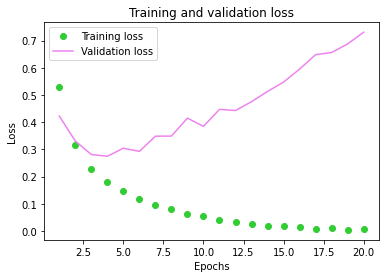

In [13]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: Basic model 의 경우, epoch(학습 수)가 늘어날수록 train loss 가 줄어드는 모습이나 validation loss 는 증가하는 모습이다. 따라서 학습이 안정적으로 이루어졌다고 볼 수 없으며, 과도하게 학습 데이터에 맞춰진 모델의 오버피팅(overfitting) 문제가 일어나고 있다.**

### (2) Basic model + batchsize = 128
batch size 는 모델의 성능에 큰 영향을 미친다. 큰 batch size 는 학습 초기에 불안정한 훈련을 유발하기도 한다.
오버피팅 문제를 해결하기 위해 batch size 를 512 에서 128 으로 줄여보았다.
- activation function: relu, sigmoid
- optimizer: RMSprop
- loss function: binary_crossentropy
- **batch size: 128**
- epoch: 20

In [14]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data=(x_val, y_val))

Epoch 1/20
118/118 [==============================] - 3s 12ms/step - loss: 0.5105 - accuracy: 0.7599 - val_loss: 0.3064 - val_accuracy: 0.8793
Epoch 2/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2189 - accuracy: 0.9224 - val_loss: 0.2745 - val_accuracy: 0.8874
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1518 - accuracy: 0.9487 - val_loss: 0.3057 - val_accuracy: 0.8839
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1136 - accuracy: 0.9621 - val_loss: 0.3446 - val_accuracy: 0.8834
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.0817 - accuracy: 0.9733 - val_loss: 0.3941 - val_accuracy: 0.8716
Epoch 6/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0663 - accuracy: 0.9803 - val_loss: 0.4200 - val_accuracy: 0.8783
Epoch 7/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0434 - accuracy: 0.9876 - val_loss: 0.4764 - val_accuracy: 0.8725
Epoch

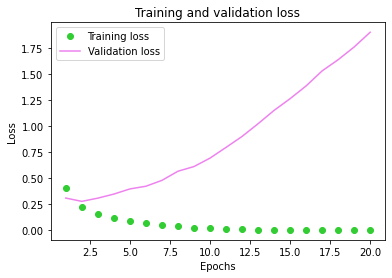

In [18]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: batch size 가 64인 경우 epoch(학습 수)가 늘어날수록 Basic model 보다 train loss 는 점점 감소하는 추세이나, validation loss 는 점차 증가하는 모습이다. batch size 를 512에서 128로 줄여도 오버피팅 문제가 해결되지 않는다.**

### (3) Basic model + optimizer = Adam
최적화 함수(optimizer)는 오차 값(loss)을 가능한 낮추는 매개변수를 찾을 수 있도록 도와준다. 그 중 Adam 은 많은 경우에 높은 성능을 내는 최적화 함수로 유명하다. 따라서 최적화 함수를 RMSprop 에서 Adam 으로 변경해보았다.
- activation function: relu, sigmoid
- **optimizer: Adam**
- loss function: binary_crossentropy
- batch size: 512
- epoch: 20

In [19]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6168 - accuracy: 0.6834 - val_loss: 0.3848 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3089 - accuracy: 0.9002 - val_loss: 0.2972 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2012 - accuracy: 0.9404 - val_loss: 0.2789 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1483 - accuracy: 0.9559 - val_loss: 0.2836 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1129 - accuracy: 0.9690 - val_loss: 0.3042 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0895 - accuracy: 0.9786 - val_loss: 0.3214 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0671 - accuracy: 0.9875 - val_loss: 0.3452 - val_accuracy: 0.8793
Epoch 8/20
30

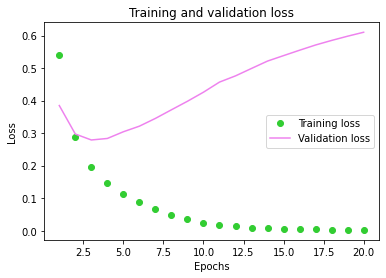

In [23]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 최적화 함수를 Adam 으로 변경해도 epoch 가 증가할수록 validation loss 가 줄어들다가 다시 증가하고 있으며, 오버피팅 문제가 여전히 일어나고 있다.**

### (4) Basic model + optimizer = SGD
최적화 함수를 SGD(Stochastic Gradient Descent)로 변경해보았다. SGD는 확률적 경사 하강법으로, loss 의 최솟값까지 랜덤하게 데이터를 선정해 지그재그 모양을 그리며 이동한다.
- activation function: relu, sigmoid
- **optimizer: SGD**
- loss function: binary_crossentropy
- batch size: 512
- epoch: 20

In [24]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6921 - accuracy: 0.5181 - val_loss: 0.6903 - val_accuracy: 0.5430
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6897 - accuracy: 0.5368 - val_loss: 0.6881 - val_accuracy: 0.5578
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6869 - accuracy: 0.5633 - val_loss: 0.6856 - val_accuracy: 0.5750
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6840 - accuracy: 0.5774 - val_loss: 0.6827 - val_accuracy: 0.5897
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6814 - accuracy: 0.5922 - val_loss: 0.6791 - val_accuracy: 0.6074
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6772 - accuracy: 0.6147 - val_loss: 0.6746 - val_accuracy: 0.6293
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6719 - accuracy: 0.6421 - val_loss: 0.6690 - val_accuracy: 0.6578
Epoch 8/20
30

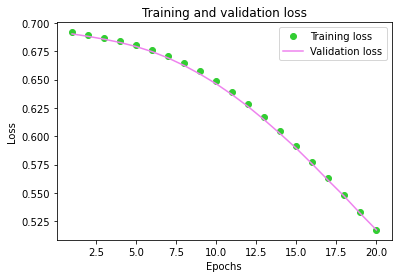

In [28]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 최적화 함수를 SGD 로 변경하자, training loss 와 validation loss 가 모두 안정적으로 감소하는 모양세를 볼 수 있었다. 이는 학습이 안정적으로 이루어졌으며, 오버피팅 문제를 해결했음을 보여준다. 그러나 예측 정확도가 80%이므로 정확도를 좀 더 올리기 위해 다른 파라미터를 변경하거나 신경망 레이어를 추가해볼 필요가 있다.**

### (5) Basic model + optimizer = SGD + activation function = relu, tanh
활성화 함수(Activation function)는 한 노드에 대한 입력값을 그 다음 노드에 보낼지 말지 결정하는 함수이다. 이번 시도에서는 마지막 층에 있는 sigmoid 함수를 모양이 비슷한 tanh 함수로 변경해 사용했다.
- **activation function: relu, tanh**
- optimizer: SGD
- loss function: binary_crossentropy
- batch size: 512
- epoch: 20

In [29]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

In [30]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 1.8675 - accuracy: 0.5050 - val_loss: 0.6902 - val_accuracy: 0.5420
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6866 - accuracy: 0.5523 - val_loss: 0.6704 - val_accuracy: 0.5901
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.6596 - accuracy: 0.6066 - val_loss: 0.6792 - val_accuracy: 0.6008
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6392 - accuracy: 0.6554 - val_loss: 0.5809 - val_accuracy: 0.7193
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5771 - accuracy: 0.7117 - val_loss: 0.5307 - val_accuracy: 0.7679
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5218 - accuracy: 0.7715 - val_loss: 0.4939 - val_accuracy: 0.7884
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4908 - accuracy: 0.7918 - val_loss: 0.5432 - val_accuracy: 0.7752
Epoch 8/20
30

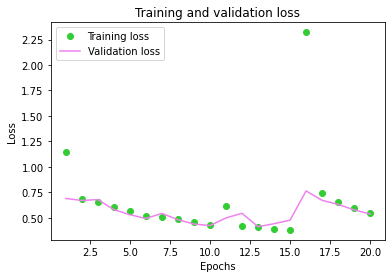

In [33]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 마지막 층에 있던 활성화 함수 sigmoid 를 tanh 로 변경하자, 학습이 안정적으로 되지 않는 모습을 볼 수 있었다.**

### (6) Basic model + optimizer = SGD + activation function = relu, tanh + Adding more layers
이번에는 앞선 실험과 파라미터를 동일하게 하되, 신경망 층을 추가해보았다. 마지막 층에만 tanh 활성화 함수를 사용하고, 나머지 층에는 relu 함수를 사용했다. 
- activation function: relu, tanh
- optimizer: SGD
- loss function: binary_crossentropy
- batch size: 512
- epoch: 20

In [34]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

In [35]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 1.5532 - accuracy: 0.4994 - val_loss: 0.6945 - val_accuracy: 0.5053
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6943 - accuracy: 0.4980 - val_loss: 0.6925 - val_accuracy: 0.5130
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6925 - accuracy: 0.5201 - val_loss: 0.6921 - val_accuracy: 0.5264
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6916 - accuracy: 0.5453 - val_loss: 0.6911 - val_accuracy: 0.5426
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6904 - accuracy: 0.5530 - val_loss: 0.6885 - val_accuracy: 0.5798
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6872 - accuracy: 0.5806 - val_loss: 0.6832 - val_accuracy: 0.6089
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6801 - accuracy: 0.6154 - val_loss: 0.6745 - val_accuracy: 0.6370
Epoch 8/20
30

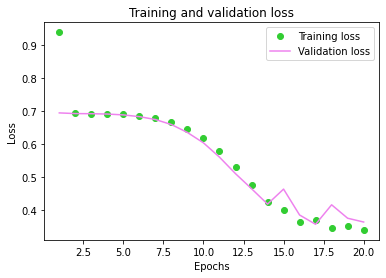

In [38]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 신경망 층을 추가하자, training loss 와 validation loss 모두 감소하는 추세였고, 예측 정확도도 83% 으로 오르는 것을 볼 수 있었다. 신경망 층을 추가하면 추가하지 않았을 때보다 학습이 안정적으로 되는 모습을 보였다.**

### (7) Basic model + optimizer = SGD + epoch = 50
epoch(학습 수)를 20번보다 많이 늘리면 정확도가 늘어날 것이라고 예상했다. 따라서 이전 실험과 같은 조건에서 학습 수를 50번으로 늘려 학습을 진행해보았다.
- activation function: relu, sigmoid
- optimizer: SGD
- loss function: binary_crossentropy
- batch size: 512
- **epoch: 50**

In [64]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [66]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 50,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 69ms/step - loss: 0.6977 - accuracy: 0.4994 - val_loss: 0.6900 - val_accuracy: 0.5257
Epoch 2/50
30/30 [==============================] - 1s 26ms/step - loss: 0.6884 - accuracy: 0.5332 - val_loss: 0.6848 - val_accuracy: 0.5724
Epoch 3/50
30/30 [==============================] - 1s 25ms/step - loss: 0.6827 - accuracy: 0.5893 - val_loss: 0.6766 - val_accuracy: 0.6118
Epoch 4/50
30/30 [==============================] - 1s 21ms/step - loss: 0.6720 - accuracy: 0.6350 - val_loss: 0.6643 - val_accuracy: 0.6614
Epoch 5/50
30/30 [==============================] - 1s 21ms/step - loss: 0.6584 - accuracy: 0.6809 - val_loss: 0.6480 - val_accuracy: 0.7024
Epoch 6/50
30/30 [==============================] - 1s 25ms/step - loss: 0.6416 - accuracy: 0.7143 - val_loss: 0.6301 - val_accuracy: 0.7376
Epoch 7/50
30/30 [==============================] - 1s 21ms/step - loss: 0.6211 - accuracy: 0.7529 - val_loss: 0.6107 - val_accuracy: 0.7547
Epoch 8/50
30

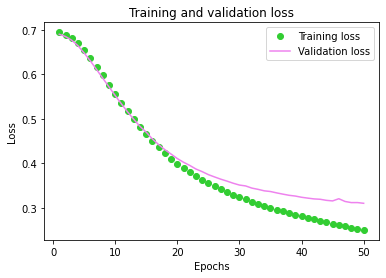

In [68]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: epoch(학습 수)를 50번으로 늘렸으나 오버피팅이 되지 않았고 학습이 안정적으로 진행되어 training loss 와 validation loss 가 모두 감소하는 추세를 보여주었다. 또한, 예측 정확도가 87%로 현재까지의 실험에서 가장 높은 정확도를 보여주었다.**

## Result
실험 결과, 가장 기본적인 신경망 모델에서 최적화 함수를 SGD 로 변경했으며 epoch 를 50으로 늘렸을 때 예측 정확도가 **87%** 로 나왔다. 또한, 이 경우에 신경망 학습이 안정적으로 되었기 때문에 training loss 와 validation loss 가 모두 줄어드는 추세를 보였으며, 기존에 있었던 오버피팅 문제를 해결할 수 있었다.